# Hierarchical Clustering of Gene Expression Data

### Introduction

Advances in high-throughput technologies have enabled the generation of large-scale gene expression datasets, creating opportunities to explore biological patterns through computational analysis. 

Unsupervised learning methods, such as hierarchical clustering, are widely used in bioinformatics to identify groups of samples with similar expression profiles without prior assumptions.

In this project, hierarchical clustering is applied to a gene expression dataset,  RNA-seq gene expression data from primary and matched metastatic breast tumors (GSE209998), obtained from the Gene Expression Omnibus (GEO).
Using Python-based bioinformatics and data science tools, the analysis aims to uncover natural sample groupings, determine the optimal number of clusters using a quantitative metric, and visualize the clustering structure through dendrograms. 
This workflow demonstrates a practical and reproducible approach to transcriptomic data analysis and highlights the role of clustering techniques in exploratory biological research.

This work was developed by adapting an exercise from the Coursera course *Introduction to Bioinformatics* offered by the Birla Institute of Technology & Science (BITS), Pilani.

## Load Libraries

### Importing Required Libraries

This code cell imports all the necessary Python libraries used throughout the bioinformatics clustering analysis.

- **pandas** and **numpy** are used for efficient data handling, numerical computation, and manipulation of gene expression matrices.
- **seaborn** and **matplotlib** are imported for data visualization, including dendrograms and exploratory plots.
- **scipy.cluster.hierarchy** provides functions for performing hierarchical clustering, generating dendrograms, and extracting cluster labels from the clustering tree.
- **calinski_harabasz_score** from `sklearn.metrics` is used to evaluate clustering quality and determine the optimal number of clusters.
- The **warnings** module is used to suppress future warnings, ensuring cleaner and more readable output during execution.

Together, these libraries form the core toolkit for performing, evaluating, and visualizing hierarchical clustering of gene expression data.

In [3]:
## Importing libraries
## For managing data 
import pandas as pd
import numpy as np

# For Visualizing
import seaborn as sns
import matplotlib.pyplot as plt

# For clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cut_tree
from sklearn.metrics import calinski_harabasz_score

# To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Hierarchical Clustering

### Function: `perform_hierarchical_clustering`

This function performs **hierarchical clustering** on a preprocessed gene expression dataset.

- The input data is expected to be a **pandas DataFrame**, where rows represent samples and columns represent features (e.g., genes).
- The `method` parameter specifies the **linkage strategy** used to calculate distances between clusters, with `average` linkage as the default.
- The `metric` parameter defines the **distance metric** used to measure similarity between samples, with Euclidean distance as the default.
- Internally, the function uses SciPy’s `linkage` method to compute the hierarchical clustering.

The function returns a **linkage matrix**, which encodes the hierarchical relationships between samples and serves as the foundation for dendrogram visualization and cluster extraction.

In [4]:
def perform_hierarchical_clustering(data, method='average', metric='euclidean'):
    return linkage(data, method=method, metric=metric)

## Finding Optimal Clusters

### Function: `find_optimal_clusters`

This function determines the **optimal number of clusters** for hierarchical clustering using a quantitative evaluation metric.

- The function iterates over a range of cluster numbers, starting from 2 up to a user-defined maximum.
- For each candidate number of clusters:
  - The hierarchical tree is cut using `fcluster` to assign samples to clusters.
  - The **Calinski–Harabasz index** is calculated to assess clustering quality based on between-cluster separation and within-cluster compactness.
- All evaluation scores are stored and compared.

The function selects and returns the number of clusters that **maximizes the Calinski–Harabasz score**, providing a data-driven approach to choosing an appropriate clustering structure.

In [5]:
def find_optimal_clusters(data, linkage_matrix, max_clusters=10):
    scores = []
    for n_clusters in range(2, max_clusters + 1):
        clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
        score = calinski_harabasz_score(data, clusters)
        scores.append(score)
    
    optimal_clusters = np.argmax(scores) + 2
    return optimal_clusters

## Generating Cluster Lables

### Function: `get_clusters`

This function extracts **cluster assignments** for each sample by cutting the hierarchical clustering tree.

- It takes the **linkage matrix** generated from hierarchical clustering and the desired number of clusters.
- The `fcluster` function is used with the `maxclust` criterion to divide the dendrogram into a specified number of clusters.
- Cluster labels are then mapped to the corresponding **sample names** using the column labels of the input data matrix.

The function returns a **pandas Series** where each sample is assigned a cluster label, making the results easy to inspect, analyze, and report.

In [6]:
def get_clusters(linkage_matrix, data, n_clusters):
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    return pd.Series(cluster_labels, index=data.columns, name='Cluster')

## Dendrogram for the Clusters

### Function: `plot_dendrogram_with_clusters`

This function visualizes the results of hierarchical clustering using a **dendrogram**.

- A dendrogram is generated from the linkage matrix to display the hierarchical relationships among samples.
- Sample labels are shown on the x-axis and rotated for improved readability.
- A horizontal dashed line is added to indicate the **cluster cutoff level**, corresponding to the selected number of clusters.
- Plot elements such as figure size, title, axis labels, and layout are customized for clarity and presentation quality.

This visualization helps interpret how samples group together and provides an intuitive overview of the clustering structure in the gene expression data.

In [7]:
def plot_dendrogram_with_clusters(linkage_matrix, labels, n_clusters, title):
    plt.figure(figsize=(12, 8))
    
    # Plot dendrogram with colored clusters
    dendrogram(linkage_matrix, 
              labels=labels, 
              leaf_rotation=90,
              color_threshold=None,
              above_threshold_color='grey')
    
    # Add horizontal line for cluster cutoff
    if n_clusters > 1:
        threshold = (linkage_matrix[-n_clusters+1, 2] + linkage_matrix[-n_clusters, 2]) / 2
        plt.axhline(y=threshold, color='r', linestyle='--')
    
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

## Main Function

### Setting Parameters and Loading the Expression Dataset

This cell initializes key analysis parameters and loads the processed gene expression data:

- The **GEO accession ID** is specified to identify the dataset used in this analysis.
- A **correlation threshold** is defined to control edge creation in the correlation network.
- The **resolution parameter** sets the granularity for Louvain community detection.
- The processed expression data is loaded from a tab-delimited text file into a **pandas DataFrame**, with the first column used as row identifiers.
- Printing the dataset shape provides a quick check of the **number of genes and samples**, ensuring the data was loaded correctly before downstream analysis.


### Loading Gene Expression Data

This code cell defines the **GEO accession number** for reference and loads the preprocessed gene expression dataset.

- The `geo_id` variable stores the GEO dataset identifier, which is useful for documentation and reproducibility.
- The gene expression data is read from a tab-delimited text file using `pandas.read_csv`.
- The first column is set as the index, representing gene or probe identifiers.
- The shape of the dataset is printed to verify successful loading and to confirm the dimensions of the expression matrix.

This step prepares the data for downstream hierarchical clustering analysis.



This loaded **preprocessed gene expression dataset** obtained from the NCBI Gene Expression Omnibus (GEO) with accession number **GSE209998**.
GSE209998 is a publicly available RNA-seq gene expression dataset, consisting of comparative gene expression profiles of breast primary tumors and matched metastatic tumors.

- The dataset represents quantitative gene expression measurements, where:
  - **Rows correspond to genes or probes**
  - **Columns correspond to biological samples**
- The data has already undergone prior preprocessing (such as normalization and background correction), making it suitable for downstream unsupervised analysis.
- The file is read as a **tab-delimited text file**, a common format for GEO-derived expression matrices.
- Setting the first column as the index ensures that gene identifiers are preserved correctly.
- Printing the dataset shape allows verification of the number of genes and samples, which is important for understanding dataset scale and computational requirements.

This dataset serves as the foundation for identifying **expression-based sample groupings** using hierarchical clustering, enabling the exploration of biological similarity and potential sample stratification.

Source of the dataset - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE209998

In [8]:
## Set GEO accession number
geo_id = "GSE209998"

## Read data
processed_data = pd.read_csv('GSE209998_AUR_129_UQN.txt', delimiter = "\t", index_col=[0])
print(processed_data.shape)

(58387, 129)


It has 129 columns and 58387 rows.  

## Data Availability

The RNA-seq dataset used in this project (GSE209998) is publicly available from the NCBI Gene Expression Omnibus (GEO).

Due to GitHub file size limitations, the raw/processed data files are not included in this repository.

You can download the dataset directly from:
- GEO Accession: GSE209998
- https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE209998

After downloading, place the data file in the project root directory before running the notebook.


### Performing Hierarchical Clustering

This code cell applies hierarchical clustering to the gene expression dataset.

- The expression matrix is **transposed** so that rows represent samples and columns represent genes, which is the correct orientation for clustering samples based on their expression profiles.
- The `perform_hierarchical_clustering` function is called to compute pairwise distances between samples and iteratively merge them into a hierarchical structure.
- The resulting **linkage matrix** encodes the clustering hierarchy and distance information between merged clusters.

This step constructs the hierarchical relationships among samples, forming the basis for cluster identification and dendrogram visualization.

In [9]:
# Performing hierarchical clustering
linkage_matrix = perform_hierarchical_clustering(processed_data.T)
print("Hierarchical clustering is done")

Hierarchical clustering is done


### Determining the Optimal Number of Clusters

The most appropriate number of clusters for the hierarchical clustering results is identified.

- The transposed expression matrix is evaluated across a range of possible cluster counts.
- For each candidate number of clusters, the clustering structure is assessed using the **Calinski–Harabasz index**, which measures cluster separation and compactness.
- The number of clusters that yields the highest score is selected as the optimal solution.
- The optimal cluster count is printed for transparency and reporting.

This step ensures that cluster selection is **data-driven** rather than arbitrary, improving the reliability of the clustering analysis.

In [10]:
# Find optimal number of clusters
optimal_clusters = find_optimal_clusters(processed_data.T, linkage_matrix)
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 4


### Assigning Samples to Clusters
This code cell assigns each sample to a cluster based on the optimal clustering solution.
- The hierarchical clustering tree is cut using the previously determined optimal number of clusters.
- Each sample is assigned a cluster label using the `get_clusters` function.
- The resulting output is a **pandas Series** that maps sample names to their corresponding cluster IDs.
This step translates the hierarchical structure into interpretable cluster memberships, enabling downstream biological interpretation and reporting.

In [11]:
# Get cluster assignments
clusters = get_clusters(linkage_matrix, processed_data, optimal_clusters)
clusters

AUR-AFEA-TTP1-A-1-0-R-A741-41    2
AUR-AFEA-TTM4-A-1-1-R-A742-41    2
AUR-AFEA-TTM2-A-1-1-R-A742-41    2
AUR-AFEA-TTM1-A-1-1-R-A742-41    2
AUR-AFEA-TTM3-A-1-1-R-A742-41    2
                                ..
AUR-AFE9-NT1-A-1-1-R-A742-41     2
AUR-AFE6-NT1-A-1-1-R-A742-41     2
AUR-AFE4-NT1-A-1-1-R-A742-41     2
AUR-AE5G-NT1-A-1-1-R-A742-41     2
AUR-AFEC-NT1-A-1-1-R-A742-41     2
Name: Cluster, Length: 129, dtype: int32

### Displaying Cluster Memberships

The **sample composition of each cluster** in a clear and readable format is printed.

- The code iterates through each cluster label from 1 to the optimal number of clusters.
- For each cluster, sample names belonging to that cluster are extracted from the cluster assignment results.
- Sample identifiers are printed together, allowing easy inspection of which samples group together.

This output facilitates biological interpretation by enabling direct comparison of sample groupings, such as identifying shared experimental conditions or phenotypic similarities within clusters.


In [12]:
# Print cluster assignments
print("\nCluster assignments:")
for cluster in range(1, optimal_clusters + 1):
    samples = clusters[clusters == cluster].index.tolist()
    print(f"\nCluster {cluster} samples:")
    print(", ".join(samples))


Cluster assignments:

Cluster 1 samples:
AUR-AER2-TTM3-A-1-1-R-A742-41, AUR-AER2-TTM1-A-1-1-R-A742-41, AUR-AFE6-TTM1-A-1-1-R-A742-41

Cluster 2 samples:
AUR-AFEA-TTP1-A-1-0-R-A741-41, AUR-AFEA-TTM4-A-1-1-R-A742-41, AUR-AFEA-TTM2-A-1-1-R-A742-41, AUR-AFEA-TTM1-A-1-1-R-A742-41, AUR-AFEA-TTM3-A-1-1-R-A742-41, AUR-AFEA-TTM6-A-1-0-R-A741-41, AUR-AFE7-TTM2-A-1-1-R-A742-41, AUR-AFE7-TTM1-A-1-1-R-A742-41, AUR-AFE7-TTM3-A-1-1-R-A742-41, AUR-AD9G-TTP1-B-4-0-R-A584-39, AUR-AD9G-TTM2-A-1-1-R-A542-39, AUR-AD9G-TTM3-A-1-1-R-A542-39, AUR-AFE5-TTP1-A-1-0-R-A741-41, AUR-AFE5-TTM4-A-1-1-R-A742-41, AUR-AFE5-TTM9-A-1-1-R-A742-41, AUR-AG0N-TTP1-A-1-0-R-A741-41, AUR-AG0N-TTM1-A-1-1-R-A743-41, AUR-AG0M-TTP1-A-2-0-R-A741-41, AUR-AG0M-TTM1-A-2-1-R-A743-41, AUR-AG0J-TTP1-A-1-0-R-A741-41, AUR-AG0J-TTM1-A-1-0-R-A743-41, AUR-AFSP-TTP1-A-8-0-R-A741-41, AUR-AFSP-TTM1-A-8-0-R-A741-41, AUR-AF9A-TTP1-A-1-0-R-A741-41, AUR-AF9A-TTM1-A-1-1-R-A742-41, AUR-AF98-TTP1-A-1-0-R-A741-41, AUR-AF98-TTM1-A-1-1-R-A742-41, AUR-AF95-

### Visualizing Hierarchical Clustering Results

A **dendrogram** to visualize the hierarchical clustering structure of the samples is generated.

- The linkage matrix is used to reconstruct the hierarchical relationships among samples.
- Sample names are displayed along the x-axis for interpretability.
- A horizontal cutoff line indicates the selected optimal number of clusters.
- The plot title includes the GEO accession number for clear dataset identification.

This visualization provides an intuitive overview of how samples cluster based on gene expression patterns and supports transparent interpretation of the clustering results.


Generating visualizations...


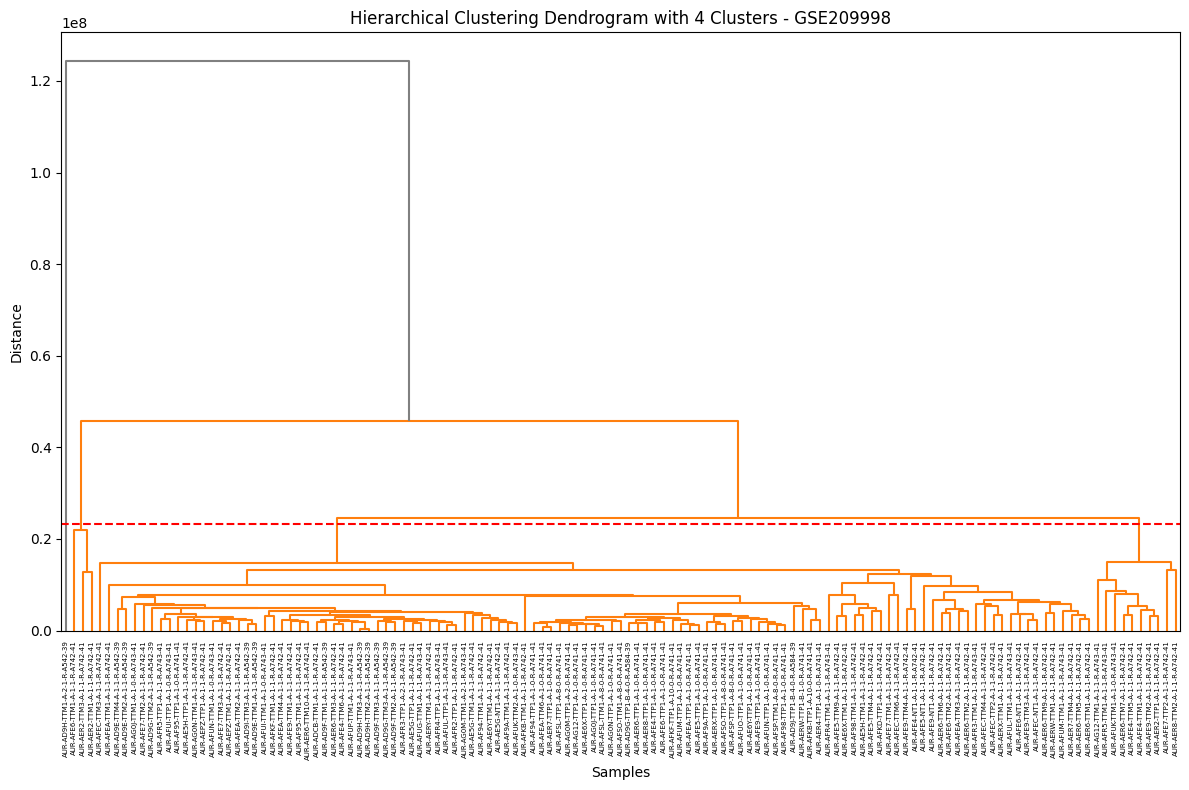

In [13]:
# Plot results
print("\nGenerating visualizations...")
plot_dendrogram_with_clusters(linkage_matrix,
                                labels=processed_data.columns,
                                n_clusters=optimal_clusters,
                                title=f"Hierarchical Clustering Dendrogram with {optimal_clusters} Clusters - {geo_id}")

### Conclusion

In this analysis, hierarchical clustering was applied to a preprocessed gene expression dataset from GEO (GSE209998), RNA-seq gene expression data from primary and matched metastatic breast tumors, to explore similarity patterns among samples. A data-driven approach using the Calinski–Harabasz index was employed to determine the optimal number of clusters, ensuring objective cluster selection. The resulting cluster assignments and dendrogram visualization revealed meaningful groupings of samples based on their expression profiles. Overall, this workflow demonstrates a reproducible and interpretable bioinformatics pipeline for unsupervised analysis of transcriptomic data using Python.
